In [ ]:
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [ ]:
# Load the dataset
df = pd.read_csv('/content/Youtube-Spam-Dataset.csv')
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,VIDEO_NAME,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",PSY - GANGNAM STYLE(?????) M/V,1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,PSY - GANGNAM STYLE(?????) M/V,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,PSY - GANGNAM STYLE(?????) M/V,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,PSY - GANGNAM STYLE(?????) M/V,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,PSY - GANGNAM STYLE(?????) M/V,1


In [ ]:
# Preprocess the text data
# Remove URLs
df['CONTENT'] = df['CONTENT'].apply(lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x, flags=re.MULTILINE))

# Remove special characters, numbers, and punctuations
df['CONTENT'] = df['CONTENT'].apply(lambda x: re.sub(r'\@w+|\#','', x))
df['CONTENT'] = df['CONTENT'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# Convert to lowercase
df['CONTENT'] = df['CONTENT'].apply(lambda x: x.lower())

In [ ]:
# Vectorize the content using TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(df['CONTENT'])
y = df['CLASS']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Define models
log_reg = LogisticRegression()
random_forest = RandomForestClassifier()
svm = SVC()
naive_bayes = MultinomialNB()

In [ ]:
# Train and evaluate Logistic Regression
log_reg.fit(X_train, y_train)
y_pred_log_reg_train = log_reg.predict(X_train)
y_pred_log_reg_test = log_reg.predict(X_test)
train_acc_log_reg = accuracy_score(y_train, y_pred_log_reg_train)
test_acc_log_reg = accuracy_score(y_test, y_pred_log_reg_test)

print("Logistic Regression Model")
print(f"Training Accuracy: {train_acc_log_reg:.4f}")
print(f"Testing Accuracy: {test_acc_log_reg:.4f}")
print(classification_report(y_test, y_pred_log_reg_test))
print('-' * 50)

Logistic Regression Model
Training Accuracy: 0.9416
Testing Accuracy: 0.8995
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       277
           1       0.96      0.85      0.90       310

    accuracy                           0.90       587
   macro avg       0.90      0.90      0.90       587
weighted avg       0.91      0.90      0.90       587

--------------------------------------------------


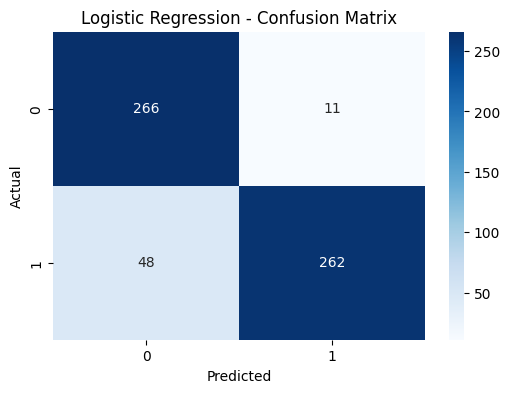

In [ ]:
# Confusion matrix for Logistic Regression
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg_test)
plt.figure(figsize=(6,4))
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Train and evaluate Random Forest
random_forest.fit(X_train, y_train)
y_pred_random_forest_train = random_forest.predict(X_train)
y_pred_random_forest_test = random_forest.predict(X_test)
train_acc_random_forest = accuracy_score(y_train, y_pred_random_forest_train)
test_acc_random_forest = accuracy_score(y_test, y_pred_random_forest_test)

print("Random Forest Model")
print(f"Training Accuracy: {train_acc_random_forest:.4f}")
print(f"Testing Accuracy: {test_acc_random_forest:.4f}")
print(classification_report(y_test, y_pred_random_forest_test))
print('-' * 50)

Random Forest Model
Training Accuracy: 0.9912
Testing Accuracy: 0.8569
              precision    recall  f1-score   support

           0       0.91      0.77      0.84       277
           1       0.82      0.93      0.87       310

    accuracy                           0.86       587
   macro avg       0.87      0.85      0.85       587
weighted avg       0.86      0.86      0.86       587

--------------------------------------------------


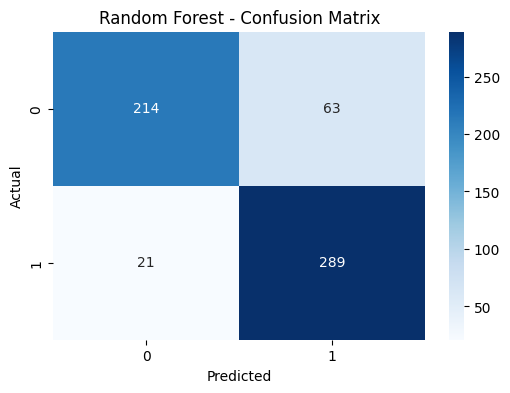

In [ ]:
# Confusion matrix for Random Forest
cm_random_forest = confusion_matrix(y_test, y_pred_random_forest_test)
plt.figure(figsize=(6,4))
sns.heatmap(cm_random_forest, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Train and evaluate SVM
svm.fit(X_train, y_train)
y_pred_svm_train = svm.predict(X_train)
y_pred_svm_test = svm.predict(X_test)
train_acc_svm = accuracy_score(y_train, y_pred_svm_train)
test_acc_svm = accuracy_score(y_test, y_pred_svm_test)

print("Support Vector Machine (SVM) Model")
print(f"Training Accuracy: {train_acc_svm:.4f}")
print(f"Testing Accuracy: {test_acc_svm:.4f}")
print(classification_report(y_test, y_pred_svm_test))
print('-' * 50)

Support Vector Machine (SVM) Model
Training Accuracy: 0.9876
Testing Accuracy: 0.9063
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       277
           1       0.97      0.85      0.91       310

    accuracy                           0.91       587
   macro avg       0.91      0.91      0.91       587
weighted avg       0.91      0.91      0.91       587

--------------------------------------------------


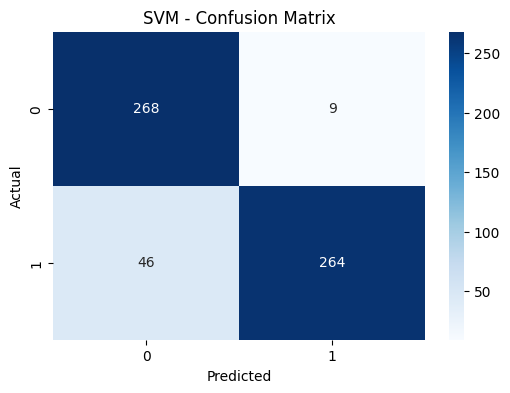

In [ ]:

# Confusion matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm_test)
plt.figure(figsize=(6,4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Train and evaluate Naive Bayes
naive_bayes.fit(X_train, y_train)
y_pred_naive_bayes_train = naive_bayes.predict(X_train)
y_pred_naive_bayes_test = naive_bayes.predict(X_test)
train_acc_naive_bayes = accuracy_score(y_train, y_pred_naive_bayes_train)
test_acc_naive_bayes = accuracy_score(y_test, y_pred_naive_bayes_test)

print("Naive Bayes Model")
print(f"Training Accuracy: {train_acc_naive_bayes:.4f}")
print(f"Testing Accuracy: {test_acc_naive_bayes:.4f}")
print(classification_report(y_test, y_pred_naive_bayes_test))
print('-' * 50)

Naive Bayes Model
Training Accuracy: 0.9606
Testing Accuracy: 0.9046
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       277
           1       0.92      0.89      0.91       310

    accuracy                           0.90       587
   macro avg       0.90      0.91      0.90       587
weighted avg       0.91      0.90      0.90       587

--------------------------------------------------


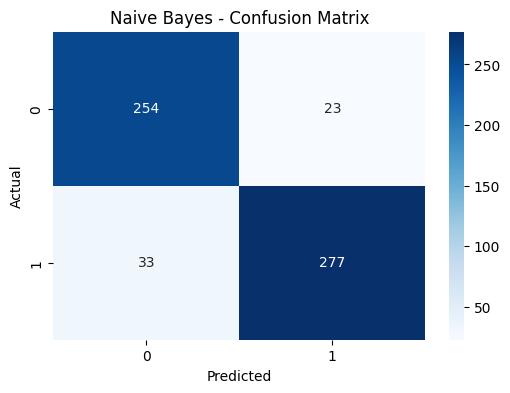

In [ ]:
# Confusion matrix for Naive Bayes
cm_naive_bayes = confusion_matrix(y_test, y_pred_naive_bayes_test)
plt.figure(figsize=(6,4))
sns.heatmap(cm_naive_bayes, annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

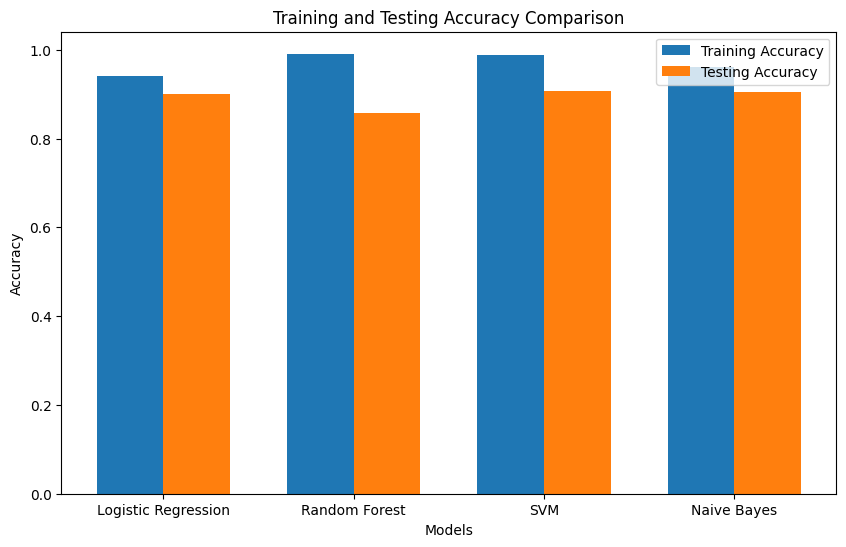

In [ ]:
# Accuracy comparison bar plot
models = ['Logistic Regression', 'Random Forest', 'SVM', 'Naive Bayes']
train_accuracies = [train_acc_log_reg, train_acc_random_forest, train_acc_svm, train_acc_naive_bayes]
test_accuracies = [test_acc_log_reg, test_acc_random_forest, test_acc_svm, test_acc_naive_bayes]

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(models))
plt.bar(index, train_accuracies, bar_width, label='Training Accuracy')
plt.bar([i + bar_width for i in index], test_accuracies, bar_width, label='Testing Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy Comparison')
plt.xticks([i + bar_width / 2 for i in index], models)
plt.legend()
plt.show()

In [ ]:
# Determine the best model based on Testing F1 Score
f1_scores = {
    'Logistic Regression': f1_score(y_test, y_pred_log_reg_test),
    'Random Forest': f1_score(y_test, y_pred_random_forest_test),
    'SVM': f1_score(y_test, y_pred_svm_test),
    'Naive Bayes': f1_score(y_test, y_pred_naive_bayes_test)
}

best_model_name = max(f1_scores, key=f1_scores.get)
best_f1_score = f1_scores[best_model_name]

print(f"Best Model: {best_model_name}")
print(f"Best Testing F1 Score: {best_f1_score:.4f}")

Best Model: Naive Bayes
Best Testing F1 Score: 0.9082


In [ ]:
# Retrain the best model on the entire training data
if best_model_name == 'Logistic Regression':
    best_model = LogisticRegression()
elif best_model_name == 'Random Forest':
    best_model = RandomForestClassifier()
elif best_model_name == 'SVM':
    best_model = SVC()
elif best_model_name == 'Naive Bayes':
    best_model = MultinomialNB()

In [ ]:
# Train the best model on the entire training set
best_model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# Test the best model on the test set
y_pred_best_model_train = best_model.predict(X_train)
y_pred_best_model_test = best_model.predict(X_test)

In [ ]:
# Evaluate the best model on both training and testing sets
train_acc_best_model = accuracy_score(y_train, y_pred_best_model_train)
test_acc_best_model = accuracy_score(y_test, y_pred_best_model_test)

print(f"Retrained Best Model: {best_model_name}")
print(f"Training Accuracy: {train_acc_best_model:.4f}")
print(f"Testing Accuracy: {test_acc_best_model:.4f}")
print(classification_report(y_test, y_pred_best_model_test))

Retrained Best Model: Naive Bayes
Training Accuracy: 0.9606
Testing Accuracy: 0.9046
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       277
           1       0.92      0.89      0.91       310

    accuracy                           0.90       587
   macro avg       0.90      0.91      0.90       587
weighted avg       0.91      0.90      0.90       587



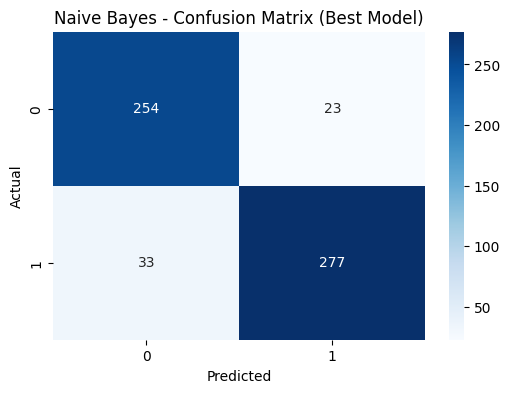

In [ ]:
# Confusion matrix for Best Model
cm_best_model = confusion_matrix(y_test, y_pred_best_model_test)
plt.figure(figsize=(6,4))
sns.heatmap(cm_best_model, annot=True, fmt='d', cmap='Blues')
plt.title(f'{best_model_name} - Confusion Matrix (Best Model)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

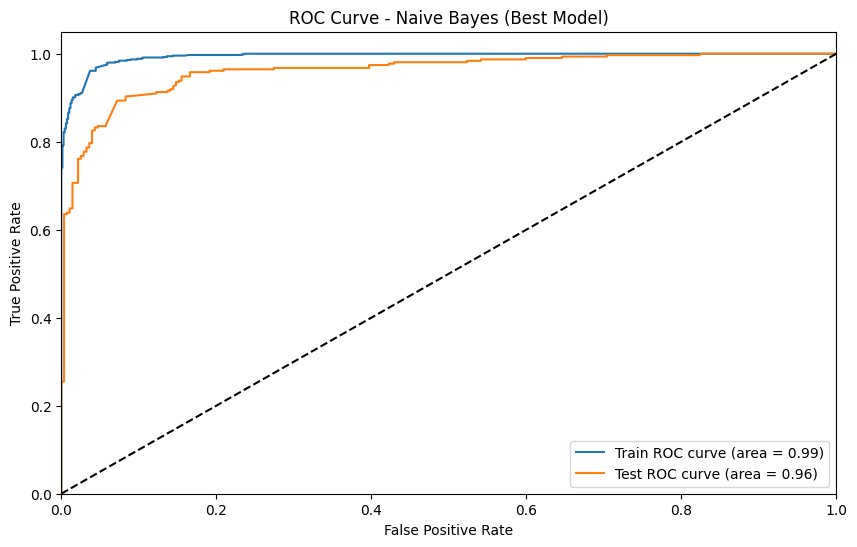

In [ ]:
# ROC Curve for the best model
y_proba_best_model_train = best_model.predict_proba(X_train)[:, 1]
y_proba_best_model_test = best_model.predict_proba(X_test)[:, 1]

fpr_train, tpr_train, _ = roc_curve(y_train, y_proba_best_model_train)
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(y_test, y_proba_best_model_test)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, label=f'Train ROC curve (area = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, label=f'Test ROC curve (area = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - {best_model_name} (Best Model)')
plt.legend(loc="lower right")
plt.show()